In [51]:
import pandas as pd
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv', header=None)
data.columns = ['A','B','C','D','E','F','G','H','I','J','K']
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
data.head()

Number of instances = 583
Number of attributes = 11


,A,B,C,D,E,F,G,H,I,J,K
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [52]:
import numpy as np
data = data.replace('?',np.NaN)
print('Number of instances = %d' % (data.shape[0]))
print('Number of attributes = %d' % (data.shape[1]))
print('Number of missing values:')
for col in data.columns:
 print('\t%s: %d' % (col,data[col].isna().sum()))

Number of instances = 583
Number of attributes = 11
Number of missing values:
	A: 0
	B: 0
	C: 0
	D: 0
	E: 0
	F: 0
	G: 0
	H: 0
	I: 0
	J: 4
	K: 0


In [53]:
data1 = data
data1 = data1.fillna(data1.median())
print('\nAfter replacing missing values:')


After replacing missing values:


In [54]:
data1[20:25]

,A,B,C,D,E,F,G,H,I,J,K
20,51,Male,2.2,1.0,610,17,28,7.3,2.6,0.55,1
21,51,Male,2.9,1.3,482,22,34,7.0,2.4,0.50,1
22,62,Male,6.8,3.0,542,116,66,6.4,3.1,0.90,1
23,40,Male,1.9,1.0,231,16,55,4.3,1.6,0.60,1
24,63,Male,0.9,0.2,194,52,45,6.0,3.9,1.85,2


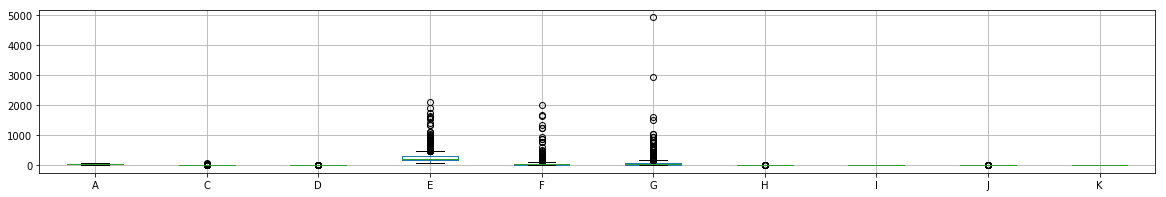

In [55]:
%matplotlib inline
data_box_data1 = data1.drop(['B'],axis=1)
data_box_data1.boxplot(figsize=(20,3))

In [56]:
from sklearn.model_selection import train_test_split
X = data1.drop(['B'], axis = 1)
y = data1.B
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [57]:
print(X_train.shape)
print(y_train.shape)

(437, 10)
(437,)


[0.7671232876712328, 0.7465753424657534, 0.6986301369863014, 0.6917808219178082, 0.6917808219178082, 0.7054794520547946, 0.7191780821917808]
0.7172211350293543


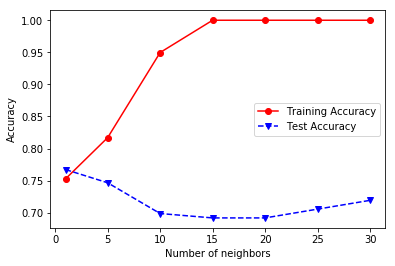

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
numDepths = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd1 = []
testAcc_knndA = []
for k in numDepths:
    clf_knnd2 = DecisionTreeClassifier(max_depth = k)
    clf_knnd2.fit(X_train, y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd1.append(accuracy_score(y_train,Y_predTrain_knnd2))
    testAcc_knndA.append(accuracy_score(y_test,Y_predTest_knnd2))
plt.plot(numNeighbors,trainAcc_knnd1,'ro-',numNeighbors,testAcc_knndA,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print(testAcc_knndA)
print(np.mean(testAcc_knndA))

[0.7123287671232876, 0.7123287671232876, 0.726027397260274, 0.7191780821917808, 0.7328767123287672, 0.7465753424657534, 0.7397260273972602]
0.7270058708414873


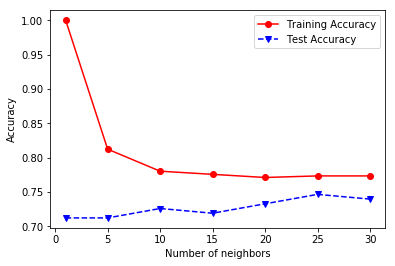

In [59]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd1 = []
testAcc_knndB = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd1.append(accuracy_score(y_train,Y_predTrain_knnd2))
    testAcc_knndB.append(accuracy_score(y_test,Y_predTest_knnd2))
plt.plot(numNeighbors,trainAcc_knnd1,'ro-',numNeighbors,testAcc_knndB,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print(testAcc_knndB)
print(np.mean(testAcc_knndB))

In [60]:
data2=data
data2 = data2.fillna(data2.median())
print('\nAfter replacing missing values:')
data2[20:25]


After replacing missing values:


,A,B,C,D,E,F,G,H,I,J,K
20,51,Male,2.2,1.0,610,17,28,7.3,2.6,0.55,1
21,51,Male,2.9,1.3,482,22,34,7.0,2.4,0.50,1
22,62,Male,6.8,3.0,542,116,66,6.4,3.1,0.90,1
23,40,Male,1.9,1.0,231,16,55,4.3,1.6,0.60,1
24,63,Male,0.9,0.2,194,52,45,6.0,3.9,1.85,2


In [76]:
AC1 = data2.drop(['B'],axis=1)
Z_AC1 = (AC1-AC1.mean())/AC1.std()
Z1 = data2.loc[((Z_AC1 > -3).sum(axis=1)==10) & ((Z_AC1 <= 3).sum(axis=1)==10),:]
data1_x = Z1.drop(['B'],axis=1)
data1_y = Z1['B']
print(data2.shape)
print(Z1.shape)

(583, 11)
(536, 11)


In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1_x, data1_y, test_size = 0.25)

In [63]:
print(X_train.shape)
print(y_train.shape)

(402, 10)
(402,)


[0.6865671641791045, 0.7164179104477612, 0.6791044776119403, 0.664179104477612, 0.664179104477612, 0.6791044776119403, 0.6865671641791045]
0.6823027718550106


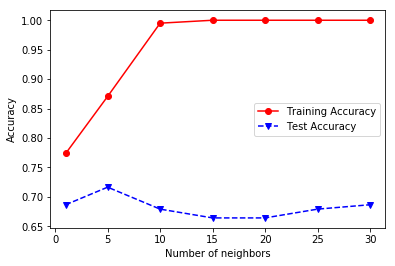

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
numDepths = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd1 = []
testAcc_knndA = []
for k in numDepths:
    clf_knnd2 = DecisionTreeClassifier(max_depth=k)
    clf_knnd2.fit(X_train, y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd1.append(accuracy_score(y_train,Y_predTrain_knnd2))
    testAcc_knndA.append(accuracy_score(y_test,Y_predTest_knnd2))
plt.plot(numNeighbors,trainAcc_knnd1,'ro-',numNeighbors,testAcc_knndA,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print(testAcc_knndA)
print(np.mean(testAcc_knndA))

[0.6567164179104478, 0.6791044776119403, 0.664179104477612, 0.664179104477612, 0.7089552238805971, 0.7089552238805971, 0.6940298507462687]
0.6823027718550108


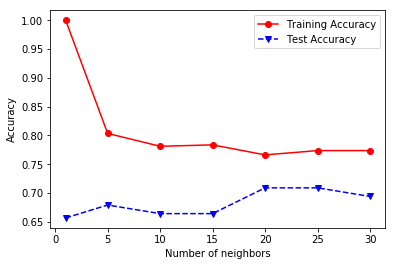

In [65]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd1 = []
testAcc_knndB = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd1.append(accuracy_score(y_train,Y_predTrain_knnd2))
    testAcc_knndB.append(accuracy_score(y_test,Y_predTest_knnd2))
plt.plot(numNeighbors,trainAcc_knnd1,'ro-',numNeighbors,testAcc_knndB,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print(testAcc_knndB)
print(np.mean(testAcc_knndB))

In [66]:
data3=data
data3 = data3.fillna(data3.median())
print('\nAfter replacing missing values:')
data3[20:25]


After replacing missing values:


,A,B,C,D,E,F,G,H,I,J,K
20,51,Male,2.2,1.0,610,17,28,7.3,2.6,0.55,1
21,51,Male,2.9,1.3,482,22,34,7.0,2.4,0.50,1
22,62,Male,6.8,3.0,542,116,66,6.4,3.1,0.90,1
23,40,Male,1.9,1.0,231,16,55,4.3,1.6,0.60,1
24,63,Male,0.9,0.2,194,52,45,6.0,3.9,1.85,2


In [67]:
import pandas as pd
data3 = data3.drop_duplicates()

In [68]:
from sklearn.model_selection import train_test_split
X = data3.drop(['B'], axis=1)
y = data3.B
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [69]:
print(X_train.shape)
print(y_train.shape)

(427, 10)
(427,)


[0.7622377622377622, 0.7692307692307693, 0.7132867132867133, 0.6993006993006993, 0.7342657342657343, 0.7132867132867133, 0.7062937062937062]
0.7282717282717284


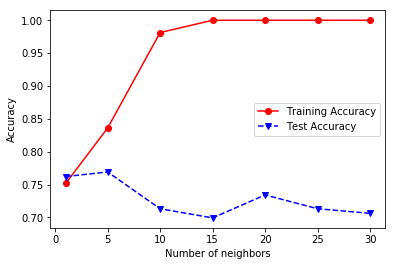

In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
numDepths = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd1 = []
testAcc_knndA = []
for k in numDepths:
    clf_knnd2 = DecisionTreeClassifier(max_depth=k)
    clf_knnd2.fit(X_train, y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd1.append(accuracy_score(y_train,Y_predTrain_knnd2))
    testAcc_knndA.append(accuracy_score(y_test,Y_predTest_knnd2))
plt.plot(numNeighbors,trainAcc_knnd1,'ro-',numNeighbors,testAcc_knndA,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print(testAcc_knndA)
print(np.mean(testAcc_knndA))

[0.6783216783216783, 0.7482517482517482, 0.8041958041958042, 0.7762237762237763, 0.7972027972027972, 0.7692307692307693, 0.7692307692307693]
0.7632367632367633


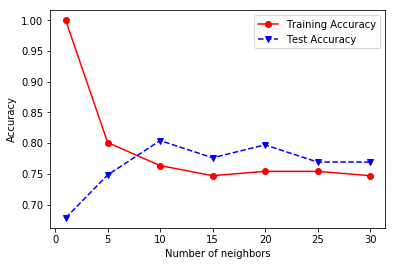

In [71]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
%matplotlib inline
numNeighbors = [1, 5, 10, 15, 20, 25, 30]
trainAcc_knnd1 = []
testAcc_knndB = []
for k in numNeighbors:
    clf_knnd2 = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
    clf_knnd2.fit(X_train, y_train)
    Y_predTrain_knnd2 = clf_knnd2.predict(X_train)
    Y_predTest_knnd2 = clf_knnd2.predict(X_test)
    trainAcc_knnd1.append(accuracy_score(y_train,Y_predTrain_knnd2))
    testAcc_knndB.append(accuracy_score(y_test,Y_predTest_knnd2))
plt.plot(numNeighbors,trainAcc_knnd1,'ro-',numNeighbors,testAcc_knndB,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')

print(testAcc_knndB)
print(np.mean(testAcc_knndB))